# Homework 0

**Name:** Oscar Beltran Villegas

**e-mail:** oscar.beltran7944@alumnos.udg.mx

# MODULES

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Theory on the Gradient Descent algorithm

## What is gradient descent?

Gradient descent is an optimization algorithm which is commonly-used to train machine learning models and neural networks. It trains machine learning models by minimizing errors between predicted and actual results.


## How Does Gradient Descent Work?

Before diving into gradient descent, it may help to review some concepts from linear regression. You may recall the formula for the slope of a line: \( y = mx + b \), where \( m \) represents the slope and \( b \) is the y-intercept.

You might also remember plotting a scatterplot in statistics and finding the line of best fit, which involved calculating the error between the actual output and the predicted output (\( \hat{y} \)) using the mean squared error formula. The gradient descent algorithm behaves similarly, but it is based on a convex function.

### Gradient Descent Process

The starting point is just an arbitrary point from which we evaluate performance. From that starting point, we find the derivative (or slope), and from there, we can use a tangent line to observe the steepness of the slope. The slope will inform the updates to the parameters—i.e., the weights and bias. The slope at the starting point will be steeper, but as new parameters are generated, the steepness should gradually reduce until it reaches the lowest point on the curve, known as the point of convergence.

### Goal of Gradient Descent

Similar to finding the line of best fit in linear regression, the goal of gradient descent is to minimize the cost function or the error between the predicted and actual \( y \). To achieve this, it requires two data points: a direction and a learning rate. These factors determine the partial derivative calculations for future iterations, allowing the algorithm to gradually arrive at the local or global minimum (i.e., the point of convergence).

### Learning Rate

The learning rate (also referred to as step size or alpha) is the size of the steps taken to reach the minimum. This value is typically small and is evaluated and updated based on the behavior of the cost function. High learning rates result in larger steps, but they risk overshooting the minimum. Conversely, a low learning rate has smaller steps, which provides more precision, but the number of iterations can compromise overall efficiency as it takes more time and computations to reach the minimum.

### Cost Function

The cost (or loss) function measures the difference or error between the actual \( y \) and the predicted \( \hat{y} \) at its current position. This improves the machine learning model's efficacy by providing feedback to the model so it can adjust the parameters to minimize the error and find the local or global minimum. The model continuously iterates, moving along the direction of steepest descent (or the negative gradient) until the cost function is close to or at zero. At this point, the model stops learning.

## Optimizing the Matyas function with gradient descent

### Gradient Descent Formula

$$
\theta = \theta - \alpha \cdot \nabla J(\theta)
$$

where:  

- *$\theta$*: parameters to be optimized  
- *$\alpha$*: learning rate, which determines the step size at each iteration  
- *$J(\theta)$*: cost function to be minimized  
- *$\nabla J(\theta)$*: gradient of the cost function with respect to $\theta$, which is a vector of partial derivatives  


```markdown
1. We select the function to optimize
```

In [2]:
# Function to be optimized

def matyas(x, y):
    return 0.26 * (x ** 2 + y ** 2) - 0.48 * x * y

```markdown
2. Define the partial derivatives of the function with respect to x and y
```

In [3]:
# Partial derivatives of the Rosenbrock function

# derivative of the matyas function with respect to x
def df_dx(x, y):
    return 0.52*x - 0.48*y

# derivative of the matyas function with respect to y
def df_dy(x, y):
    return 0.52*y - 0.48*x

```markdown
3. Definition of the gradient descent function: This function minimizes matyas(x, y) by iteratively updating x and y using their gradients (df_dx, df_dy) and a learning rate. It records the parameter history and returns the final values and the function result after a set number of iterations.
```

In [4]:
def gradient_descent(start_x, start_y, learning_rate, num_iterations):
    # Initialize the parameters
    x = start_x
    y = start_y
    history = []
    
    # Perform the gradient descent iterations
    for i in range(num_iterations):
        # Calculate the gradients
        grad_x = df_dx(x, y)
        grad_y = df_dy(x, y)
        
        # Update the parameters
        x = x - learning_rate * grad_x
        y = y - learning_rate * grad_y
        
        # Save the history of the parameters
        history.append((x, y, matyas(x, y)))
    
    return x, y, matyas(x, y), history

```markdown
4. initialization and execution of the gradient descent function with the following parameters:
```

In [5]:
# Run gradient descent algorithm

start_x, start_y = 20, 30
learning_rate = 0.1
num_iterations = 1000
x_opt, y_opt, f_opt, history = gradient_descent(start_x, start_y, learning_rate, num_iterations)

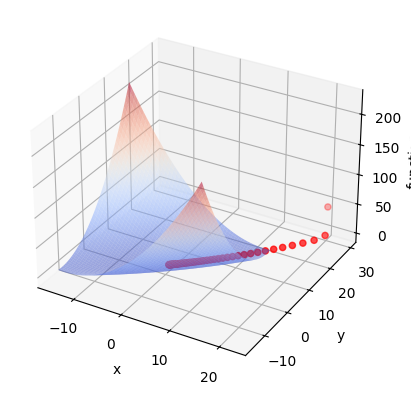

In [6]:
# Plot the results
x_range = np.arange(-15, 15, 0.1)
y_range = np.arange(-15, 15, 0.1)

X, Y = np.meshgrid(x_range, y_range)
Z = matyas(X,Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.5)

ax.scatter(*zip(*history[::20]), c='r', marker='o')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('function')
plt.show()